# BIOS 823 Final Exam (14 December 2018)

- The time allocated is 3 hours
- This is a **closed book** examination
    - Close ALL applications on your laptop
    - Start an empty browser with a SINGLE Tab in FULL SCREEN MODE
    - You should only have this SINGLE notebook page open in your browser, with NO OTHER TABS or WINDOWS
- You are not allowed any reference material except for the following:
    - Cheat sheet (1 letter-sized paper, both sides)
    - Built-in help accessible either by `?foo`, `foo?` or `help(foo)`
- ALL necessary imports of Python modules have been done for you. 
- **You should not import any additional modules - this includes standard library packages**.

The questions are worth a total of 120 points, but the maximum score is 100. Note that answers will be graded on **correctness**, **efficiency** and **readability**.

<font color=blue>By taking this exam, you acknowledge that you have read the instructions and agree to abide by the Duke Honor Code.</font>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1**. (10 points)

Warm up exercise.

Find the 5 most common words and their counts in `data/moby.txt`, after removing punctuation, setting to lowercase and splitting by blank space.

In [2]:
import string

In [3]:
d = {}
with open('data/moby.txt') as f:
    text = f.read()
    teext = text.translate(str.maketrans('', '', string.punctuation))
    for word in text.lower().split():
        d[word] = d.get(word, 0) + 1

sorted(d.items(), key=lambda x: -x[1])[:5]

[('the', 10), ('i', 9), ('and', 7), ('to', 5), ('a', 5)]

**2**. (10 points)

- Assemble the data from `features`, `subjects`, `X`, and `y` into a single `pandas.DataFrame (DF)` called `har`.  You should end up with a DF that is 7352 by 562 with `activity` as the first column. Rows and columns should be appropriately labeled.
    - `X` is a matrix where each row is a feature matrix
    - The columns of X are given in `features`
    - Each row of X is a subject given in `subjects`
    - `y` is a code for the type of activity performed by the subject (name the column in the DataFrame `actvitity`)
- Name the index `subject`
- Display a sample of 5 rows chosen at random without replacement and the first 5 columns.

In [4]:
activities = np.loadtxt('data/HAR/activity_labels.txt', dtype='str')
features = np.loadtxt('data/HAR/features.txt', dtype='str')[:, 1]
subjects = np.loadtxt('data/HAR/train/subject_train.txt', dtype='int')
X = np.loadtxt('data/HAR/train/X_train.txt')
y = np.loadtxt('data/HAR/train/y_train.txt', dtype='int')

In [5]:
har = pd.DataFrame(np.c_[X, y], columns=np.r_[features, ['activity']], index=subjects)
har.index.name = 'subject'
har.sample(5).iloc[:, :5]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y
subject,,,,,
28,0.282746,-0.017251,-0.086639,-0.990880,-0.939111
6,0.271074,-0.031402,-0.115867,-0.972892,-0.806478
7,0.283341,-0.011380,-0.084487,-0.985699,-0.976139
8,0.274587,-0.016545,-0.106002,-0.996729,-0.993019
30,0.278151,-0.015879,-0.112355,-0.998946,-0.990229


**3**. (10 points)

Using the DF from Question 1, find the average feature value for each subject for all features that have the string `entropy` in it but does NOT end in X, Y or Z. Use method chaining to perform this operation and show a random sample of 5 rows without replacement as a single expression.

In [6]:
(
    har.
    filter(regex='.*entropy.*[^X-Z]$').
    groupby('subject').
    mean().
    sample(5)
)

,tBodyAccMag-entropy(),tGravityAccMag-entropy(),tBodyAccJerkMag-entropy(),tBodyGyroMag-entropy(),tBodyGyroJerkMag-entropy(),fBodyAccMag-entropy(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroJerkMag-entropy()
subject,,,,,,,,,
15,0.106594,0.106594,-0.088288,0.194027,0.076354,-0.199673,-0.343391,-0.131656,-0.339061
27,-0.043521,-0.043521,-0.186377,0.150040,-0.049764,-0.333092,-0.446033,-0.258082,-0.426227
14,0.259380,0.259380,0.025811,0.055561,0.228575,-0.084659,-0.292221,0.053050,-0.153560
30,0.181579,0.181579,-0.029463,0.142545,0.166739,-0.148709,-0.323636,-0.045888,-0.257323
3,0.213677,0.213677,0.026110,0.421044,0.236416,-0.112686,-0.275714,-0.016602,-0.239745


**4**. (10 points)

Write an SQL query against the `har` table to count the number of distinct subjects and the total number of rows for each activity, ordering the results by number of rows for each activity in decreasing order. A simple example of how to run an SQL query using `pandas` is provided.

In [7]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/har.db', echo=False)

In [8]:
query = '''
SELECT subject, activity 
FROM har 
LIMIT 5
'''
pd.read_sql(query, con=engine)

,subject,activity
0,1,5.0
1,1,5.0
2,1,5.0
3,1,5.0
4,1,5.0


In [9]:
query = '''
SELECT activity, count(DISTINCT subject), count(*)
FROM har 
GROUP BY activity
ORDER BY count(*) DESC
LIMIT 5
'''
pd.read_sql(query, con=engine)

,activity,count(DISTINCT subject),count(*)
0,6.0,21,1407
1,5.0,21,1374
2,4.0,21,1286
3,1.0,21,1226
4,2.0,21,1073


**5**. (25 points)

- Create a new DF `df` from the `har` DF with all features that include the string `Acc-mean`
- Scale the feature columns so that all features have mean 0 and standard deviation 1
- Use SVD to find the first two principal components
- Plot the first two principal components as a scatter plot colored by the `activity` type of each feature vector
- Plot the 2D t-SNE plot colored in the same way (t-SNE dimension reduction may take 1-2 minutes)

Do not import any other packages apart from the cell below.

In [10]:
from scipy.linalg import svd
from sklearn.manifold import TSNE

In [11]:
df = har.filter(regex='Acc-mean')
df = df.transform(lambda x: (x - x.mean())/x.std())

In [12]:
np.allclose(0, df.mean(axis=0))

True

In [13]:
np.allclose(1, df.std(axis=0))

True

In [14]:
U, s, Vt = svd(df)
pc = U[:,:2] @ np.diag(s[:2])

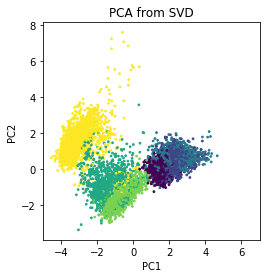

In [15]:
plt.scatter(pc[:, 0], pc[:, 1], s=3, c=har['activity'])
plt.axis('square')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA from SVD')
pass

In [16]:
tsne = TSNE(n_components=2)

In [17]:
df_tsne = tsne.fit_transform(df)

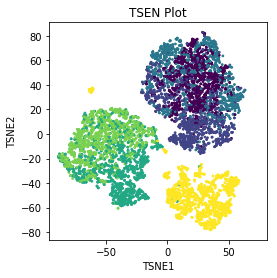

In [19]:
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=3, c=har['activity'])
plt.axis('square')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('TSEN Plot')
pass

**6**. (25 points)

You are given training and test data and labels using a subset of the HAR data set. Your job is to use these features to classify rows into WALKING UPSTAIRS (code = 2) or WALKING DOWNSTAIRS (code = 3). 

- Scale the data to have mean zero and unit standard deviation using `StandardScaler`, taking care to apply the same scaling parameters for the training and test data sets
- Use the LaeblEncoder to transform the codes 2 and 3 to 0 and 1 in `y_train` and `y_test` 
- Perform ridge regression to classify data as WALKING UPSTAIRS or WALKING DOWNSTAIRS
    - Train the model with an Cs value chosen from one of (0.01, 0.1, 1, 10, 100) by 5-fold cross-validation using the training data
    - Plot the ROC curve (TPR versus FPR) evaluated on the test data

The necessary classes from `sklearn` are imported for you. Do not use any other `sklearn` classes

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve

In [21]:
X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

In [22]:
ss = StandardScaler()
le = LabelEncoder()

ss.fit(X_train)
le.fit(y_train)

X_train = ss.transform(X_train)
y_train = le.transform(y_train)
X_test = ss.transform(X_test)
y_test = le.transform(y_test)

In [23]:
clf = LogisticRegressionCV(Cs=(0.01, 0.1, 1, 10, 100), cv=5)

In [24]:
clf.fit(X_train, y_train)
y_pred = clf.decision_function(X_test)

In [25]:
fpr, tpr, threhsolds = roc_curve(y_test, y_pred)

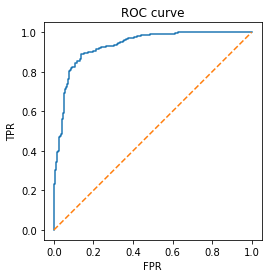

In [26]:
plt.step(fpr, tpr, '-')
plt.plot([0,1], [0,1], '--')
plt.axis('square')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
pass

**7**. (30 points)

- Make the `kmeans` function given below by using Cython. A simple example is given as a hint.
- Find the speed-up of the Cython version.

#### Cython example 

In [27]:
from timeit import timeit

In [28]:
%load_ext cython

In [29]:
def square(x):
    return x**2

def foo(X):
    """Python function."""

    n = len(X)
    s = 0.0
    for i in range(n):
        s += square(X[i])
    return s

In [30]:
%%cython -a

import cython
from libc.math cimport pow

cdef double square_cython(double x):
    return pow(x, 2)

@cython.wraparound(False)
@cython.boundscheck(False)
def foo_cython(double[:] X):
    """Cython function."""

    cdef int n = X.shape[0]
    cdef double s = 0.0
    
    cdef int i
    
    for i in range(n):
        s += square_cython(X[i])
    return s

In [31]:
foo(np.arange(10.0))

285.0

In [32]:
foo_cython(np.arange(10.0))

285.0

#### Algorithm to Cythonize

In [33]:
def cdist(X, Y):
    """Matrix of Euclidean distances between vectors in X and vectors in Y."""
    
    m, p = X.shape
    n, p = Y.shape
    M = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            d = 0
            for k in range(p):
                d += (X[i,k] - Y[j,k])**2
            M[i, j] = np.sqrt(d)
    return M        

In [34]:
def kemans(X, k, iters=10):
    """K-means with fixed number of iterations."""

    r, c = X.shape
    centers = X[:k]
    for i in range(iters):
        m = cdist(X, centers)
        z = np.argmin(m, axis=1)
        centers = np.array([np.mean(X[z==i], axis=0) for i in range(k)])
    return (z, centers)

In [35]:
np.random.seed(2017)
from sklearn.datasets import make_blobs

npts = 10000
nc = 6
X, y = make_blobs(n_samples=npts, centers=nc)

In [36]:
z, centers = kemans(X, nc)

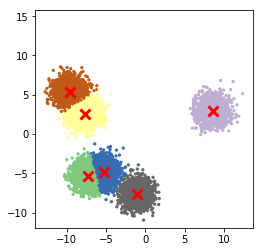

In [37]:
plt.scatter(X[:, 0], X[:, 1], s=5, c=z,
            cmap=plt.cm.get_cmap('Accent', nc))
plt.scatter(centers[:, 0], centers[:, 1], marker='x',
            linewidth=3, s=100, c='red')
plt.axis('square')
pass

In [38]:
%%cython -a

import cython
import numpy as np
from libc.math cimport sqrt

@cython.wraparound(False)
@cython.boundscheck(False)
cdef double[:, :] cdist_cython(double[:, :] X, double[:, :] Y):
    """Matrix of Euclidean distances between vectors in X and vectors in Y."""
    
    cdef int m = X.shape[0]
    cdef int p = X.shape[1]
    cdef int n = Y.shape[0]
    cdef double d
    cdef int i, j, k;
    
    cdef double[:, :] M = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            d = 0
            for k in range(p):
                d += (X[i,k] - Y[j,k])**2
            M[i, j] = sqrt(d)
    return M        

@cython.wraparound(False)
@cython.boundscheck(False)
def kemans_cython(X, int k, int iters=10):
    """K-means with fixed number of iterations."""

    cdef int r = X.shape[0]
    cdef int c = X.shape[1]
    cdef double[:, :] centers = X[:k]
    
    cdef int i, j
    cdef double[:, :] m
    
    for i in range(iters):
        m = cdist_cython(X, centers)
        z = np.argmin(m, axis=1)
        centers = np.array([np.mean(X[z==j], axis=0) for j in range(k)])
    return (z, centers)

In [39]:
z, centers = kemans_cython(X, nc)

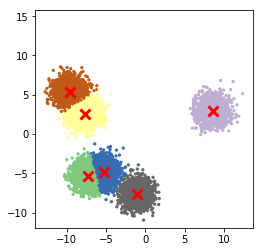

In [40]:
plt.scatter(X[:, 0], X[:, 1], s=5, c=z,
            cmap=plt.cm.get_cmap('Accent', nc))
plt.scatter(centers[:, 0], centers[:, 1], marker='x',
            linewidth=3, s=100, c='red')
plt.axis('square')
pass

In [41]:
t1 = timeit(lambda : kemans(X, nc), number=1)
t2 = timeit(lambda : kemans_cython(X, nc), number=1)

In [42]:
t1/t2

251.93192158808208